In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
#Outcome = 1 hastalıklı 
#Outcome = 0 sağlıklı
data = pd.read_csv("C:\\Users\\metec\\OneDrive\\Masaüstü\\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


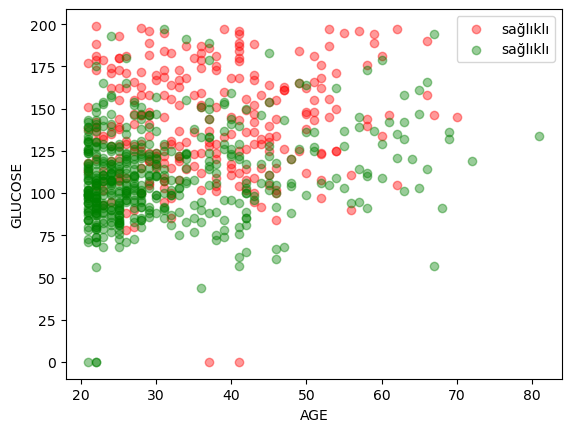

In [30]:
#hastaların yaşları ve yaşlara oranla Glucose depğerlerine bakarak bir tablo çizilimi ve yaş dağılımlarının gözlenmesi.

hasta = data[data.Outcome == 1]
saglikli = data[data.Outcome == 0]

plt.scatter(hasta.Age, hasta.Glucose, color = 'red', label = 'sağlıklı', alpha = 0.4)
plt.scatter(saglikli.Age, saglikli.Glucose, color = 'green', label = 'sağlıklı', alpha = 0.4)
plt.xlabel("AGE")
plt.ylabel("GLUCOSE")
plt.legend()
plt.show()

In [31]:
#''doğruluk oranını max seviyeye çıkarmak amacıyla min max scaler kullanarak csv değerlerimizin hepsini 0 ila 1 değerlerine atıyoruzç.ç


y = data.Outcome.values 
x_işlenmemiş = data.drop(["Outcome"],axis = 1)
x = (x_işlenmemiş - np.min(x_işlenmemiş))/(np.max(x_işlenmemiş) - np.min(x_işlenmemiş))

print("Normalizasyon öncesi veri =\n")
print(x_işlenmemiş.head())

print("\n\n\nNormalizasyon Sonrası Güncellenmiş Veri = \n")
print(x.head())

Normalizasyon öncesi veri =

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Normalizasyon Sonrası Güncellenmiş Veri = 

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0

C:\Users\metec\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\metec\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\metec\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [32]:
#datanın test ve train olarak ayrılması işlemi bu kısımda 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 1)


knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)
predicion = knn.predict(x_test)
print("K = 6 için verilerimizin doğrulama test sonucu", knn.score (x_test, y_test))

K = 6 için verilerimizin doğrulama test sonucu 0.8311688311688312


In [48]:
# sayac oluşturup for ile dönmemin sebebi 1 ila 11. değerler arasındaki doğrulukları görebilmek istememdi.1 ila farklı değerleri verilirse eğer doğruluk oranı değişmekte.
sayac = 1 
for k in range(1,12):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train, y_train)
    print(sayac, " ", "Doğruluk oranı = %",knn_yeni.score(x_test, y_test)*100)
    sayac += 1

1   Doğruluk oranı = % 71.42857142857143
2   Doğruluk oranı = % 71.42857142857143
3   Doğruluk oranı = % 83.11688311688312
4   Doğruluk oranı = % 80.51948051948052
5   Doğruluk oranı = % 81.81818181818183
6   Doğruluk oranı = % 83.11688311688312
7   Doğruluk oranı = % 80.51948051948052
8   Doğruluk oranı = % 80.51948051948052
9   Doğruluk oranı = % 79.22077922077922
10   Doğruluk oranı = % 79.22077922077922
11   Doğruluk oranı = % 83.11688311688312


In [35]:
#kullanılan verilerden ayrı yeni bir hasta çıkışı yapılmak istenirse bu blok kullanılacak.
sc = MinMaxScaler()
sc.fit_transform(x_işlenmemiş)

new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

C:\Users\metec\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\metec\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1